In [5]:
# import packages that we will use
import pandas as pd
import numpy as np
import seaborn as sns
import psycopg2

import matplotlib.pyplot as plt
import matplotlib.mlab as mlab
import matplotlib

import pymongo
import pandas as pd
from pymongo import MongoClient
import pandas.io.sql as sqlio

plt.style.use('ggplot')
from matplotlib.pyplot import figure

%matplotlib inline
#matplotlib.rcParams['figure.figsize'] = (12,8)

pd.options.mode.chained_assignment = None

try:
    dbConnection = psycopg2.connect(
    user = "dap",
    password = "dap",
    host = "104.40.254.70",
    port = "5432",
    database = "meat")
    dbConnection.set_isolation_level(0)# AUTOCOMMIT
    dbCursor = dbConnection.cursor()
    sql="select * from meat_prod_Cont"
    meat_data=sqlio.read_sql_query(sql,dbConnection)
    df = pd.DataFrame(data=meat_data)
    #dbCursor.close()
except (Exception , psycopg2.Error) as dbError :
    print ("Error while connecting to PostgreSQL", dbError)
    
df.info()
#df.head

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 406 entries, 0 to 405
Data columns (total 11 columns):
 #   Column       Non-Null Count  Dtype 
---  ------       --------------  ----- 
 0   id           406 non-null    int64 
 1   year         406 non-null    object
 2   area         406 non-null    object
 3   area_code    406 non-null    object
 4   element      406 non-null    object
 5   bovine       406 non-null    int64 
 6   pigmeat      406 non-null    int64 
 7   poultry      406 non-null    int64 
 8   mutton_goat  406 non-null    int64 
 9   other_meat   406 non-null    int64 
 10  meat_tot     406 non-null    int64 
dtypes: int64(7), object(4)
memory usage: 35.0+ KB


## plot Meat production per Continent

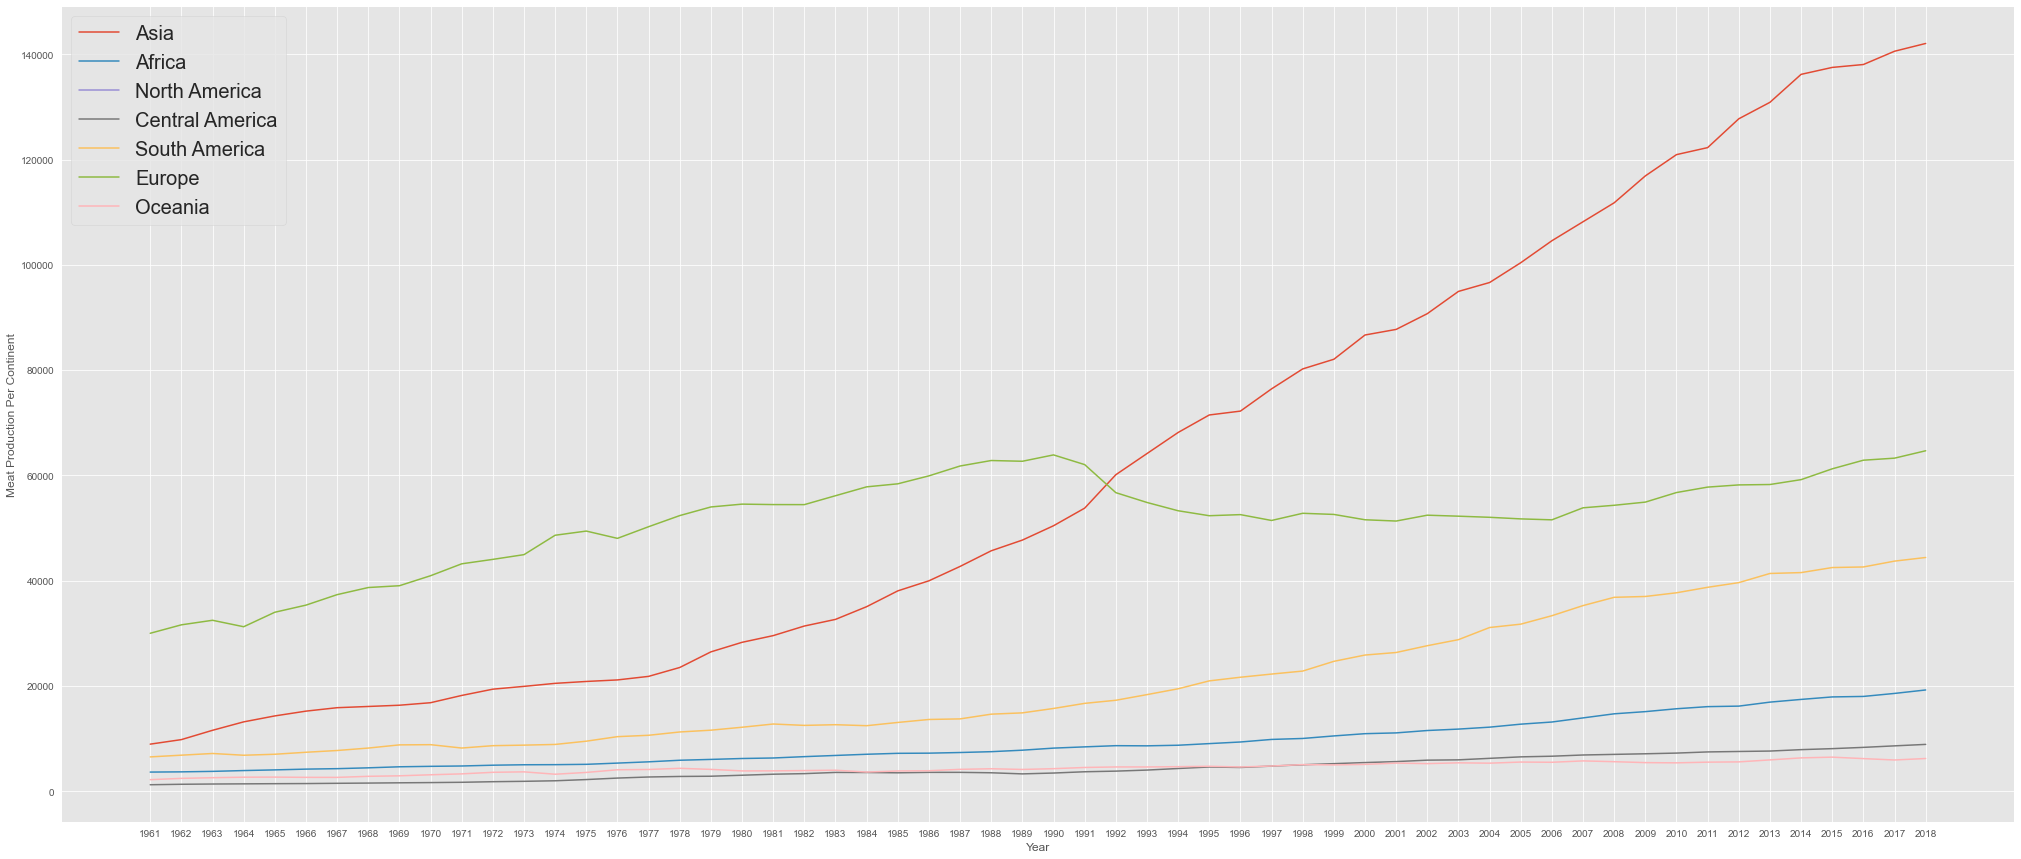

In [18]:
plt.figure(figsize=(35,15))
Asia = df[df.area == 'Asia']
Africa = df[df.area == 'Africa']
Namerica = df[df.area == 'North America']
Camerica = df[df.area == 'Central America']
Samerica = df[df.area == 'South America']
Europe = df[df.area == 'Europe']
Oceania = df[df.area == 'Oceania']


plt.plot(Asia.year, Asia.meat_tot)
plt.plot(Africa.year, Africa.meat_tot)
plt.plot(Namerica.year, Namerica.meat_tot)
plt.plot(Camerica.year, Camerica.meat_tot)
plt.plot(Samerica.year, Samerica.meat_tot)
plt.plot(Europe.year, Europe.meat_tot)
plt.plot(Oceania.year, Oceania.meat_tot)

plt.legend(['Asia', 'Africa','North America','Central America','South America','Europe','Oceania'], prop={"size":20})
plt.xlabel('Year')
plt.ylabel('Meat Production Per Continent')
plt.show()

## Stacked Area Chart

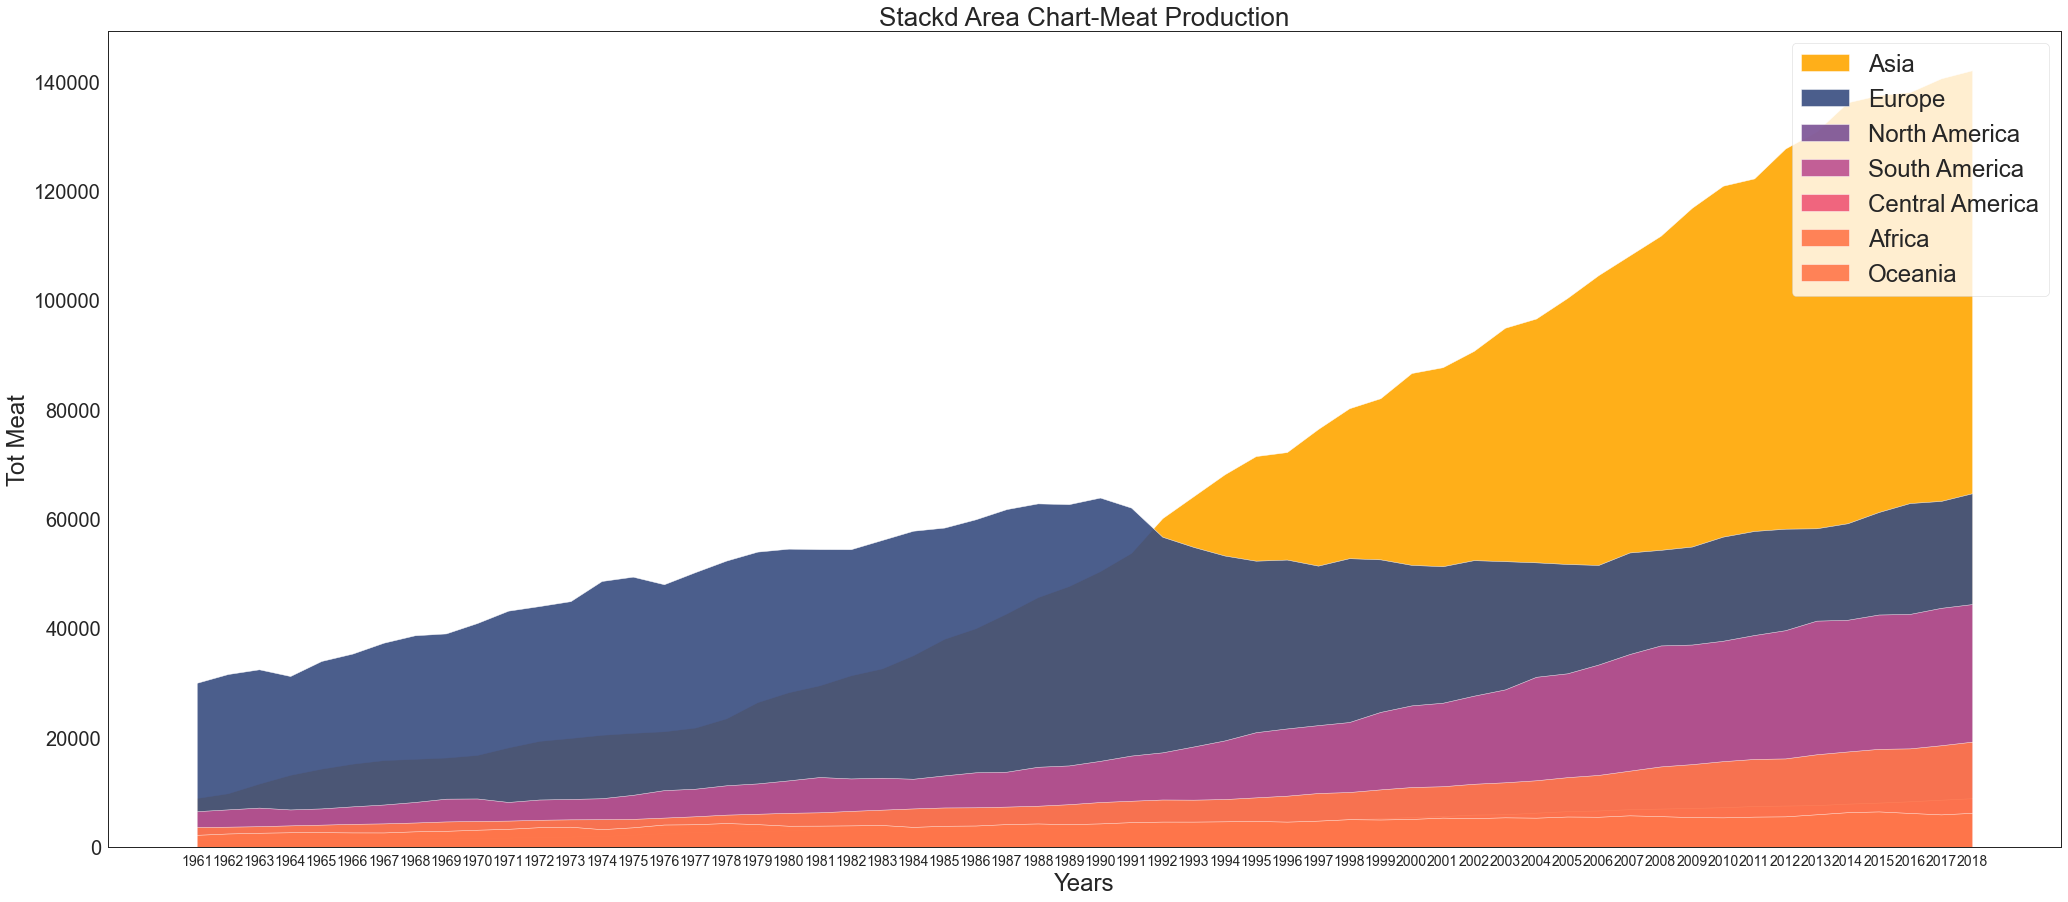

In [27]:
# library
import numpy as np
import matplotlib.pyplot as plt

plt.figure(figsize=(35,15))

sns.set_style("white")

plt.xlabel('Years', size = 24)
plt.ylabel('Tot Meat', size = 24)
plt.title('Stackd Area Chart-Meat Production', size = 26)
plt.xticks(size = 14)
plt.yticks(size = 20)

pal = ["#ffa600", "#374c80", "#7a5195", "#bc5090","#ef5675", "#ff764a","#003f5c"]
plt.stackplot(Asia.year, Asia.meat_tot, colors=pal[0], alpha=0.9 )
plt.stackplot(Europe.year, Europe.meat_tot, colors=pal[1], alpha=0.9 )
plt.stackplot(Namerica.year, Namerica.meat_tot, colors=pal[2], alpha=0.9 )
plt.stackplot(Samerica.year, Samerica.meat_tot, colors=pal[3], alpha=0.9 )
plt.stackplot(Camerica.year, Camerica.meat_tot, colors=pal[4], alpha=0.9 )
plt.stackplot(Africa.year, Africa.meat_tot, colors=pal[5], alpha=0.9 )
plt.stackplot(Oceania.year, Oceania.meat_tot, colors=pal[5], alpha=0.9 )

plt.legend(['Asia', 'Europe','North America','South America','Central America','Africa','Oceania'], prop={"size":24})

plt.show()

## Bar Chart Race... takes a while to load, please wait until is fully loaded

In [28]:
import bar_chart_race as bcr

dfg=df.pivot(index='year', columns='area', values='meat_tot')
#dfg

In [32]:
import bar_chart_race as bcr

#dfg=df.pivot(index='year', columns='area', values='meat_tot')

bcr.bar_chart_race(
    df=dfg,
    #filename='meat_prod_top.mp4',
    orientation='v',
    sort='desc',
    n_bars=7,
    fixed_order=False,
    fixed_max=True,
    steps_per_period=10,
    interpolate_period=False,
    label_bars=True,
    bar_size=.75,
    period_label={'x': .99, 'y': .25, 'ha': 'right', 'va': 'center'},
    #period_fmt='%Y',
    period_summary_func=lambda v, r: {'x': .99, 'y': .18,
                                      's': f'Total meat: {v.nlargest(7).sum():,.0f}',
                                      'ha': 'right', 'size': 10, 'family': 'Arial'},
    perpendicular_bar_func='median',
    period_length=700,
    figsize=(4, 3),
    dpi=100,
    cmap='dark12',
    title='TOP Meat Production by Continent',
    title_size='',
    bar_label_size=7,
    tick_label_size=7,
    shared_fontdict={'family' : 'Helvetica', 'color' : '.9'},
    scale='linear',
    writer=None,
    fig=None,
    bar_kwargs={'alpha': .9},
    filter_column_colors=False)  

c:\users\ermesa_pepe\appdata\local\programs\python\python39\lib\site-packages\bar_chart_race\_make_chart.py:294: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_xticklabels(self.df_values.columns, ha='right')
c:\users\ermesa_pepe\appdata\local\programs\python\python39\lib\site-packages\bar_chart_race\_make_chart.py:295: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_yticklabels([max_val] * len(ax.get_yticks()))
c:\users\ermesa_pepe\appdata\local\programs\python\python39\lib\site-packages\bar_chart_race\_make_chart.py:260: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_xticklabels(ax.get_xticklabels(), ha='right', rotation=30)


Global meat production has increased rapidly over the past 50 years – as we see, total production has more than quadrupled since 1961. The chart shows global meat production by region, measured in tonnes.

Regionally, Asia is the largest meat producer, accounting for around 40-45 percent of total meat production. This regional distribution has changed significantly in recent decades. In 1961, Europe and North America were the dominant meat producers, accounting for 42 and 25 percent, respectively. In 1961, Asia produced only 12 percent. By 2013, Europe and North America’s share had fallen to 19 and 15 percent, respectively.


## Meat Production by animal (Bovine)

## Bar Chart Race chart takes a while to load, please wait until is loaded

In [7]:
import bar_chart_race as bcr

dfg=df.pivot(index='year', columns='area', values='bovine')

bcr.bar_chart_race(
    df=dfg,
    #filename='meat_prod_top.mp4',
    orientation='h',
    sort='desc',
    n_bars=7,
    fixed_order=False,
    fixed_max=True,
    steps_per_period=10,
    interpolate_period=False,
    label_bars=True,
    bar_size=.75,
    period_label={'x': .99, 'y': .25, 'ha': 'right', 'va': 'center'},
    #period_fmt='%Y',
    period_summary_func=lambda v, r: {'x': .99, 'y': .18,
                                      's': f'Total meat: {v.nlargest(7).sum():,.0f}',
                                      'ha': 'right', 'size': 14, 'family': 'Arial'},
    perpendicular_bar_func='median',
    period_length=700,
    figsize=(4, 3),
    dpi=100,
    cmap='Plasma',
    title='Bovine-Production by Continent',
    title_size='',
    bar_label_size=7,
    tick_label_size=7,
    shared_fontdict={'family' : 'Helvetica', 'color' : '.1'},
    scale='linear',
    writer=None,
    fig=None,
    bar_kwargs={'alpha': .7},
    filter_column_colors=False)  


findfont: Font family ['Helvetica'] not found. Falling back to DejaVu Sans.
findfont: Font family ['Helvetica'] not found. Falling back to DejaVu Sans.
findfont: Font family ['Helvetica'] not found. Falling back to DejaVu Sans.
c:\users\ermesa_pepe\appdata\local\programs\python\python39\lib\site-packages\bar_chart_race\_make_chart.py:286: UserWarning:

FixedFormatter should only be used together with FixedLocator

c:\users\ermesa_pepe\appdata\local\programs\python\python39\lib\site-packages\bar_chart_race\_make_chart.py:287: UserWarning:

FixedFormatter should only be used together with FixedLocator



## Meat Production by animal (Poultry)
## Bar Chart Race chart takes a while to load, please wait until is loaded

In [35]:
import bar_chart_race as bcr

dfg=df.pivot(index='year', columns='area', values='poultry')

bcr.bar_chart_race(
    df=dfg,
    #filename='meat_prod_top.mp4',
    orientation='h',
    sort='desc',
    n_bars=7,
    fixed_order=False,
    fixed_max=True,
    steps_per_period=10,
    interpolate_period=False,
    label_bars=True,
    bar_size=.75,
    period_label={'x': .99, 'y': .25, 'ha': 'right', 'va': 'center'},
    #period_fmt='%Y',
    period_summary_func=lambda v, r: {'x': .99, 'y': .18,
                                      's': f'Total meat: {v.nlargest(7).sum():,.0f}',
                                      'ha': 'right', 'size': 14, 'family': 'Arial'},
    perpendicular_bar_func='median',
    period_length=700,
    figsize=(4, 3),
    dpi=100,
    cmap='autumn',
    title='Poultry-Production by Continent',
    title_size='',
    bar_label_size=7,
    tick_label_size=7,
    shared_fontdict={'family' : 'Helvetica', 'color' : '.1'},
    scale='linear',
    writer=None,
    fig=None,
    bar_kwargs={'alpha': .7},
    filter_column_colors=False) 

c:\users\ermesa_pepe\appdata\local\programs\python\python39\lib\site-packages\bar_chart_race\_make_chart.py:286: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_yticklabels(self.df_values.columns)
c:\users\ermesa_pepe\appdata\local\programs\python\python39\lib\site-packages\bar_chart_race\_make_chart.py:287: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_xticklabels([max_val] * len(ax.get_xticks()))


## Meat Production by animal (Pigmeat)
## Bar Chart Race chart takes a while to load, please wait until is loaded

In [145]:
import bar_chart_race as bcr

dfg=df.pivot(index='year', columns='area', values='pigmeat')

bcr.bar_chart_race(
    df=dfg,
    #filename='meat_prod_top.mp4',
    orientation='h',
    sort='desc',
    n_bars=7,
    fixed_order=False,
    fixed_max=True,
    steps_per_period=10,
    interpolate_period=False,
    label_bars=True,
    bar_size=.75,
    period_label={'x': .99, 'y': .25, 'ha': 'right', 'va': 'center'},
    #period_fmt='%Y',
    period_summary_func=lambda v, r: {'x': .99, 'y': .18,
                                      's': f'Total meat: {v.nlargest(7).sum():,.0f}',
                                      'ha': 'right', 'size': 14, 'family': 'Arial'},
    perpendicular_bar_func='median',
    period_length=700,
    figsize=(4, 3),
    dpi=100,
    cmap='summer',
    title='Pigmeat-Production by Continent',
    title_size='',
    bar_label_size=7,
    tick_label_size=7,
    shared_fontdict={'family' : 'Helvetica', 'color' : '.1'},
    scale='linear',
    writer=None,
    fig=None,
    bar_kwargs={'alpha': .7},
    filter_column_colors=True) 

c:\users\ermesa_pepe\appdata\local\programs\python\python39\lib\site-packages\bar_chart_race\_make_chart.py:286: UserWarning:

FixedFormatter should only be used together with FixedLocator

c:\users\ermesa_pepe\appdata\local\programs\python\python39\lib\site-packages\bar_chart_race\_make_chart.py:287: UserWarning:

FixedFormatter should only be used together with FixedLocator



Meat production by animal
In the chart we see how meat production has changed by livestock type since 1961.

At a global level we see that the dominant livestock types are poultry, bovine, pig. However, the distribution of meat types varies significantly across the world; in some countries, other meat types such as wild game, horse, and duck can account for a significant share of total production.

Although production of all major meat types have been increasing in absolute terms, in relative terms the share of global meat types have changed significantly over the last 50 years. In 1961, poultry meat accounted for only 12 percent of global meat production; by 2013 its share has approximately tripled to around 35 percent. In comparison, beef and buffalo meat as a share of total meat production has nearly halved, now accounting for around 22 percent. Pigmeat’s share has remained more constant at approximately 35-40 percent.

# Meat Consumption by Continent

In [36]:
try:
    dbConnection = psycopg2.connect(
    user = "dap",
    password = "dap",
    host = "104.40.254.70",
    port = "5432",
    database = "meat")
    dbConnection.set_isolation_level(0)# AUTOCOMMIT
    dbCursor = dbConnection.cursor()
    sql="select * from meat_cons_Cont order by area asc"
    meat_data=sqlio.read_sql_query(sql,dbConnection)
    df = pd.DataFrame(data=meat_data)
    #dbCursor.close()
except (Exception , psycopg2.Error) as dbError :
    print ("Error while connecting to PostgreSQL", dbError)

import bar_chart_race as bcr

dfg=df.pivot(index='year', columns='area', values='meat_tot')

bcr.bar_chart_race(
    df=dfg,
    #filename='meat_prod_top.mp4',
    orientation='v',
    sort='desc',
    n_bars=7,
    fixed_order=False,
    fixed_max=True,
    steps_per_period=10,
    interpolate_period=False,
    label_bars=True,
    bar_size=.75,
    period_label={'x': .99, 'y': .25, 'ha': 'right', 'va': 'center'},
    #period_fmt='%Y',
    period_summary_func=lambda v, r: {'x': .99, 'y': .18,
                                      's': f'Total meat: {v.nlargest(7).sum():,.0f}',
                                      'ha': 'right', 'size': 14, 'family': 'Arial'},
    perpendicular_bar_func='median',
    period_length=700,
    figsize=(4, 3),
    dpi=100,
    cmap='dark12',
    title='TOP Meat Consumption by Continent',
    title_size='',
    bar_label_size=7,
    tick_label_size=7,
    shared_fontdict={'family' : 'Helvetica', 'color' : '.1'},
    scale='linear',
    writer=None,
    fig=None,
    bar_kwargs={'alpha': .7},
    filter_column_colors=False)  

c:\users\ermesa_pepe\appdata\local\programs\python\python39\lib\site-packages\bar_chart_race\_make_chart.py:294: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_xticklabels(self.df_values.columns, ha='right')
c:\users\ermesa_pepe\appdata\local\programs\python\python39\lib\site-packages\bar_chart_race\_make_chart.py:295: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_yticklabels([max_val] * len(ax.get_yticks()))
c:\users\ermesa_pepe\appdata\local\programs\python\python39\lib\site-packages\bar_chart_race\_make_chart.py:260: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_xticklabels(ax.get_xticklabels(), ha='right', rotation=30)


## Meat Consumption by Category-what are the type of meat that people prefer?

In [8]:
try:
    dbConnection = psycopg2.connect(
    user = "dap",
    password = "dap",
    host = "104.40.254.70",
    port = "5432",
    database = "meat")
    dbConnection.set_isolation_level(0)# AUTOCOMMIT
    dbCursor = dbConnection.cursor()
    sql="select * from meat_cons_Cont order by area asc"
    meat_data=sqlio.read_sql_query(sql,dbConnection)
    df = pd.DataFrame(data=meat_data)
    #dbCursor.close()
except (Exception , psycopg2.Error) as dbError :
    print ("Error while connecting to PostgreSQL", dbError)
    
import bar_chart_race as bcr

#dfg=df.pivot(index='year', columns='area', values='meat_tot')
dfg=df[['year','bovine','poultry','pigmeat','mutton_goat','other_meat', 'meat_tot']]
dfg = dfg.set_index('year')
bcr.bar_chart_race(
    df=dfg,
    #filename='meat_prod_top.mp4',
    orientation='v',
    sort='desc',
    n_bars=6,
    fixed_order=False,
    fixed_max=True,
    steps_per_period=10,
    interpolate_period=False,
    label_bars=True,
    bar_size=.75,
    period_label={'x': .99, 'y': .25, 'ha': 'right', 'va': 'center'},
    #period_fmt='%Y',
    period_summary_func=lambda v, r: {'x': .99, 'y': .18,
                                      's': f'Total meat: {v.nlargest(6).sum():,.0f}',
                                      'ha': 'right', 'size': 14, 'family': 'Arial'},
    perpendicular_bar_func='median',
    period_length=700,
    figsize=(4, 3),
    dpi=100,
    cmap='dark12',
    title='TOP Meat Consumption by Category',
    title_size='',
    bar_label_size=7,
    tick_label_size=7,
    shared_fontdict={'family' : 'Helvetica', 'color' : '.1'},
    scale='linear',
    writer=None,
    fig=None,
    bar_kwargs={'alpha': .7},
    filter_column_colors=False)  

c:\users\ermesa_pepe\appdata\local\programs\python\python39\lib\site-packages\bar_chart_race\_make_chart.py:294: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_xticklabels(self.df_values.columns, ha='right')
c:\users\ermesa_pepe\appdata\local\programs\python\python39\lib\site-packages\bar_chart_race\_make_chart.py:295: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_yticklabels([max_val] * len(ax.get_yticks()))
c:\users\ermesa_pepe\appdata\local\programs\python\python39\lib\site-packages\bar_chart_race\_make_chart.py:260: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_xticklabels(ax.get_xticklabels(), ha='right', rotation=30)


In [ ]:
#print('Pandas version ' + pd.__version__)
#pip install pandas --upgrade

## STEPS To create a dashborad
* Load Data
* Build App
* Define callback to update graph
* Run app and display result inline in the notebook

#### Bubble PLot with Time Slide 
#### The Chart will e accessible the cliccable link that will appear http://127.0.0.1:8050/

In [38]:
import dash
import dash_core_components as dcc
import dash_html_components as html
from dash.dependencies import Input, Output
import plotly.express as px
import psycopg2
import pandas.io.sql as sqlio
import pandas as pd
from sqlalchemy import create_engine

try:
    dbConnection = psycopg2.connect(
    user = "dap",
    password = "dap",
    host = "104.40.254.70",
    port = "5432",
    database = "meat")
    dbConnection.set_isolation_level(0)# AUTOCOMMIT
    dbCursor = dbConnection.cursor()
    sql="select area, year, meat_tot, poultry,bovine from meat_prod_Cont where year > '1960' group by area,year,meat_tot,poultry,bovine order by meat_tot desc"
    meat_data=sqlio.read_sql_query(sql,dbConnection)
    df = pd.DataFrame(data=meat_data)
    #dbCursor.close()
except (Exception , psycopg2.Error) as dbError :
    print ("Error while connecting to PostgreSQL", dbError)

    
#df.columns = df.columns.str.strip()
df.to_csv('dashW.csv', index=False)  
df = pd.read_csv('dashW.csv')

external_stylesheets = ['https://codepen.io/chriddyp/pen/bWLwgP.css']

app = dash.Dash(__name__, external_stylesheets=external_stylesheets)

app.layout = html.Div([
    dcc.Graph(id='graph-with-slider'),
    dcc.Slider(
        id='year-slider',
        min=df['year'].min(),
        max=df['year'].max(),
        value=df['year'].min(),
        marks={str(year): str(year) for year in df['year'].unique()},
        step=None
    )
])


@app.callback(
    Output('graph-with-slider', 'figure'),
    Input('year-slider', 'value'))
def update_figure(selected_year):
    filtered_df = df[df.year == selected_year]

    fig = px.scatter(filtered_df, x="bovine", y="poultry",
                     size="meat_tot", color='area',hover_name='area',log_x=True, size_max=95)
    fig.update_layout(transition_duration=500)

    return(fig)


if __name__ == '__main__':
    #app.run_server(debug=True,use_reloader=False)
    app.run_server()
   


Dash is running on http://127.0.0.1:8050/

 * Serving Flask app "__main__" (lazy loading)
 * Environment: production
   Use a production WSGI server instead.
 * Debug mode: off


 * Running on http://127.0.0.1:8050/ (Press CTRL+C to quit)
127.0.0.1 - - [02/May/2021 04:11:59] "GET / HTTP/1.1" 200 -
127.0.0.1 - - [02/May/2021 04:12:01] "GET /_dash-layout HTTP/1.1" 200 -
127.0.0.1 - - [02/May/2021 04:12:01] "GET /_dash-dependencies HTTP/1.1" 200 -
127.0.0.1 - - [02/May/2021 04:12:05] "POST /_dash-update-component HTTP/1.1" 200 -
127.0.0.1 - - [02/May/2021 04:12:12] "POST /_dash-update-component HTTP/1.1" 200 -


## Dash to compare Meat-Services in Time

In [ ]:
import dash
import dash_core_components as dcc
import dash_html_components as html
from dash.dependencies import Input, Output
import plotly.express as px

import pandas as pd

external_stylesheets = ['https://codepen.io/chriddyp/pen/bWLwgP.css']

app = dash.Dash(__name__, external_stylesheets=external_stylesheets)

try:
    dbConnection = psycopg2.connect(
    user = "dap",
    password = "dap",
    host = "104.40.254.70",
    port = "5432",
    database = "meat")
    dbConnection.set_isolation_level(0)# AUTOCOMMIT
    dbCursor = dbConnection.cursor()
    sql="select * from meat_cont where year>'1960' order by meat_tot desc"
    meat_data=sqlio.read_sql_query(sql,dbConnection)
    df = pd.DataFrame(data=meat_data)
    #dbCursor.close()
except (Exception , psycopg2.Error) as dbError :
    print ("Error while connecting to PostgreSQL", dbError)


df.to_csv('dashC.csv', index=False)  
df = pd.read_csv('dashC.csv')
available_indicators = df['element'].unique()

app.layout = html.Div([
    html.Div([

        html.Div([
            dcc.Dropdown(
                id='xaxis-column',
                options=[{'label': i, 'value': i} for i in available_indicators],
                value='Production'
            ),
            dcc.RadioItems(
                id='xaxis-type',
                options=[{'label': i, 'value': i} for i in ['Linear', 'Log']],
                value='Linear',
                labelStyle={'display': 'inline-block'}
            )
        ],
        style={'width': '48%', 'display': 'inline-block'}),

        html.Div([
            dcc.Dropdown(
                id='yaxis-column',
                options=[{'label': i, 'value': i} for i in available_indicators],
                value='Consumption'
            ),
            dcc.RadioItems(
                id='yaxis-type',
                options=[{'label': i, 'value': i} for i in ['Linear', 'Log']],
                value='Linear',
                labelStyle={'display': 'inline-block'}
            )
        ],style={'width': '48%', 'float': 'right', 'display': 'inline-block'})
    ]),

    dcc.Graph(id='graph-with-slider'),

    dcc.Slider(
        id='year--slider',
        min=df['year'].min(),
        max=df['year'].max(),
        value=df['year'].max(),
        marks={str(year): str(year) for year in df['year'].unique()},
        step=None
    )
])

@app.callback(
    Output('graph-with-slider', 'figure'),
    Input('xaxis-column', 'value'),
    Input('yaxis-column', 'value'),
    Input('xaxis-type', 'value'),
    Input('yaxis-type', 'value'),
    Input('year--slider', 'value'))
def update_graph(xaxis_column_name, yaxis_column_name,
                 xaxis_type, yaxis_type,
                 year_value):
    dff = df[df['year'] == year_value]

    fig = px.scatter(x=dff[dff['element'] == xaxis_column_name]['meat_tot'],
                     y=dff[dff['element'] == yaxis_column_name]['meat_tot'],
                     hover_name=dff[dff['element'] == yaxis_column_name]['area'],
                     color=dff[dff['element'] == yaxis_column_name]['area'],
                     size=dff[dff['element'] == yaxis_column_name]['meat_tot'])

   # fig.update_layout(margin={'l': 40, 'b': 40, 't': 10, 'r': 0}, hovermode='closest')

    fig.update_xaxes(title=xaxis_column_name,
                     type='linear' if xaxis_type == 'Linear' else 'log')

    fig.update_yaxes(title=yaxis_column_name,
                     type='linear' if yaxis_type == 'Linear' else 'log')

    return fig


if __name__ == '__main__':
    app.run_server()

ERROR! Session/line number was not unique in database. History logging moved to new session 204
Dash is running on http://127.0.0.1:8050/

Dash is running on http://127.0.0.1:8050/

Dash is running on http://127.0.0.1:8050/



INFO:__main__:Dash is running on http://127.0.0.1:8050/



 * Serving Flask app "__main__" (lazy loading)
 * Environment: production
   Use a production WSGI server instead.
 * Debug mode: off


 * Running on http://127.0.0.1:8050/ (Press CTRL+C to quit)
INFO:werkzeug: * Running on http://127.0.0.1:8050/ (Press CTRL+C to quit)
127.0.0.1 - - [02/May/2021 04:14:16] "GET / HTTP/1.1" 200 -
INFO:werkzeug:127.0.0.1 - - [02/May/2021 04:14:16] "GET / HTTP/1.1" 200 -
127.0.0.1 - - [02/May/2021 04:14:18] "GET /_dash-layout HTTP/1.1" 200 -
INFO:werkzeug:127.0.0.1 - - [02/May/2021 04:14:18] "GET /_dash-layout HTTP/1.1" 200 -
127.0.0.1 - - [02/May/2021 04:14:18] "GET /_dash-dependencies HTTP/1.1" 200 -
INFO:werkzeug:127.0.0.1 - - [02/May/2021 04:14:18] "GET /_dash-dependencies HTTP/1.1" 200 -
127.0.0.1 - - [02/May/2021 04:14:18] "POST /_dash-update-component HTTP/1.1" 200 -
INFO:werkzeug:127.0.0.1 - - [02/May/2021 04:14:18] "POST /_dash-update-component HTTP/1.1" 200 -


In [ ]:
#%tb

## Example of animation showing the quantity of meat total imported vs bovine meat for each Continent

In [186]:
import dash
import dash_core_components as dcc
import dash_html_components as html
from dash.dependencies import Input, Output
import plotly.express as px


import pandas as pd

external_stylesheets = ['https://codepen.io/chriddyp/pen/bWLwgP.css']

app = dash.Dash(__name__, external_stylesheets=external_stylesheets)

try:
    dbConnection = psycopg2.connect(
    user = "dap",
    password = "dap",
    host = "104.40.254.70",
    port = "5432",
    database = "meat")
    dbConnection.set_isolation_level(0)# AUTOCOMMIT
    dbCursor = dbConnection.cursor()
    sql="select *from meat_import_cont where year>'1960' order by year asc, meat_tot desc"
   
    meat_data=sqlio.read_sql_query(sql,dbConnection)
    df = pd.DataFrame(data=meat_data)
    #dbCursor.close()
except (Exception , psycopg2.Error) as dbError :
    print ("Error while connecting to PostgreSQL", dbError)


df.to_csv('dashA.csv', index=False)  
df = pd.read_csv('dashA.csv')

#df = px.data.gapminder()
animations = {
    'Scatter': px.scatter(
        df, x="meat_tot", y="bovine", animation_frame="year", 
        animation_group="area", size="meat_tot", color="area", 
        hover_name="area", log_x=True, size_max=65, 
        range_x=[1,25000], range_y=[-200,7000]),
    'Bar': px.bar(
        df, x="bovine", y="meat_tot", color="area", 
        animation_frame="year", animation_group="area", 
        range_y=[0,10000]),
}

app = dash.Dash(__name__)

app.layout = html.Div([
    html.P("Select an animation:"),
    dcc.RadioItems(
        id='selection',
        options=[{'label': x, 'value': x} for x in animations],
        value='Scatter'
    ),
    dcc.Graph(id="graph"),
])

@app.callback(
    Output("graph", "figure"), 
    [Input("selection", "value")])
def display_animated_graph(s):
    return animations[s]

app.run_server()

Dash is running on http://127.0.0.1:8050/

Dash is running on http://127.0.0.1:8050/

Dash is running on http://127.0.0.1:8050/

Dash is running on http://127.0.0.1:8050/

Dash is running on http://127.0.0.1:8050/

Dash is running on http://127.0.0.1:8050/

Dash is running on http://127.0.0.1:8050/

Dash is running on http://127.0.0.1:8050/

Dash is running on http://127.0.0.1:8050/

Dash is running on http://127.0.0.1:8050/

Dash is running on http://127.0.0.1:8050/

Dash is running on http://127.0.0.1:8050/

Dash is running on http://127.0.0.1:8050/

Dash is running on http://127.0.0.1:8050/

Dash is running on http://127.0.0.1:8050/

Dash is running on http://127.0.0.1:8050/

Dash is running on http://127.0.0.1:8050/

Dash is running on http://127.0.0.1:8050/

Dash is running on http://127.0.0.1:8050/

Dash is running on http://127.0.0.1:8050/

Dash is running on http://127.0.0.1:8050/

Dash is running on http://127.0.0.1:8050/

Dash is running on http://127.0.0.1:8050/

Dash is run

INFO:__main__:Dash is running on http://127.0.0.1:8050/



 * Serving Flask app "__main__" (lazy loading)
 * Environment: production
   Use a production WSGI server instead.
 * Debug mode: off


 * Running on http://127.0.0.1:8050/ (Press CTRL+C to quit)
INFO:werkzeug: * Running on http://127.0.0.1:8050/ (Press CTRL+C to quit)
127.0.0.1 - - [01/May/2021 16:37:19] "GET / HTTP/1.1" 200 -
INFO:werkzeug:127.0.0.1 - - [01/May/2021 16:37:19] "GET / HTTP/1.1" 200 -
127.0.0.1 - - [01/May/2021 16:37:21] "GET /_dash-layout HTTP/1.1" 200 -
INFO:werkzeug:127.0.0.1 - - [01/May/2021 16:37:21] "GET /_dash-layout HTTP/1.1" 200 -
127.0.0.1 - - [01/May/2021 16:37:21] "GET /_dash-dependencies HTTP/1.1" 200 -
INFO:werkzeug:127.0.0.1 - - [01/May/2021 16:37:21] "GET /_dash-dependencies HTTP/1.1" 200 -
127.0.0.1 - - [01/May/2021 16:37:22] "POST /_dash-update-component HTTP/1.1" 200 -
INFO:werkzeug:127.0.0.1 - - [01/May/2021 16:37:22] "POST /_dash-update-component HTTP/1.1" 200 -


## Treemap Chart

In [6]:
import plotly.express as px
import numpy as np
import psycopg2
try:
    dbConnection = psycopg2.connect(
    user = "dap",
    password = "dap",
    host = "104.40.254.70",
    port = "5432",
    database = "meat")
    dbConnection.set_isolation_level(0)# AUTOCOMMIT
    dbCursor = dbConnection.cursor()
    sql="select *from meat_prod_Cont where year>'2015' order by year asc, meat_tot desc"
   
    meat_data=sqlio.read_sql_query(sql,dbConnection)
    df = pd.DataFrame(data=meat_data)
    #dbCursor.close()
except (Exception , psycopg2.Error) as dbError :
    print ("Error while connecting to PostgreSQL", dbError)
df = df[df["year"] == "2018"]

fig1 = px.treemap(df, path=['area'], values='meat_tot',
                  color='meat_tot', hover_data=['area'],
                  color_continuous_scale='RdBu',
                  color_continuous_midpoint=np.average(df['meat_tot'], weights=df['meat_tot']))
#fig.show()
import plotly.express as px
import numpy as np
try:
    dbConnection = psycopg2.connect(
    user = "dap",
    password = "dap",
    host = "104.40.254.70",
    port = "5432",
    database = "meat")
    dbConnection.set_isolation_level(0)# AUTOCOMMIT
    dbCursor = dbConnection.cursor()
    sql="select *from meat_cons_Cont where year>'2015' order by year asc, meat_tot desc"
   
    meat_data=sqlio.read_sql_query(sql,dbConnection)
    df = pd.DataFrame(data=meat_data)
    #dbCursor.close()
except (Exception , psycopg2.Error) as dbError :
    print ("Error while connecting to PostgreSQL", dbError)
df = df[df["year"] == "2018"]

fig2 = px.treemap(df, path=['area'], values='meat_tot',
                  color='meat_tot', hover_data=['area'],
                  color_continuous_scale='RdBu',
                  color_continuous_midpoint=np.average(df['meat_tot'], weights=df['meat_tot']))
fig1.show()
fig2.show()